# Regression Modeling in Practice, exercise 2: Basic Linear Regression

## Dataset: Bike sharing

I am using the bike sharing dataset of https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset, which provides data on how many bikes are rent out on specific hours of specific days, the weather on these days, whether the day was a weekday or not, etc. Temperature is indicated as a normalized value between 0 and 1, where one corresponds to 41 degrees Celcius; unfortunatly it is not clear what 0 corresponds to (the data is from Washington DC, I'm assuming temperatures below 0 occur there..). I will test a basic linear regression model between temperature and the number of bikes rent.

In [27]:
%matplotlib inline
import numpy
import pandas
import statsmodels.formula.api as smf
import seaborn
import matplotlib.pyplot as plt

data = pandas.read_csv('day.csv', low_memory=False)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Centering the explanatory variable (temperature)
The mean (normalized) temperature is:

In [28]:
numpy.mean(data['temp'])

0.49538478850889184

Creating a new variable 'centered_temp' in data to store the centered temperature.

In [29]:
data['centered_temp']=data['temp']-numpy.mean(data['temp'])
print("centered temp mean: ",numpy.mean(data['centered_temp']))

centered temp mean:  5.429613287325492e-17


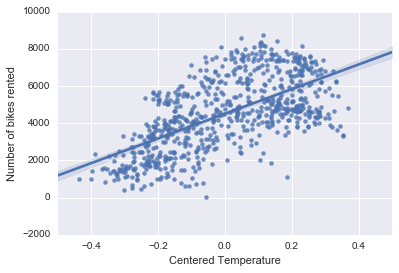

In [32]:
seaborn.regplot(x="centered_temp", y="cnt", fit_reg=True, data=data)
plt.xlabel('Centered Temperature')
plt.ylabel('Number of bikes rented');

## Fitting the regression model

In [30]:
model = smf.ols(formula='cnt ~ centered_temp', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Sun, 08 May 2016   Prob (F-statistic):           2.81e-81
Time:                        13:58:11   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      4504.3488     55.827     80.684

## Conclusion
The results of the linear regression model indicated that the number of bikes rented was significantly (p=2.81e-81) and positively associated with temperature.

The linear model is:

cnt = 4504.3488 + 6640.7100 * centered_temp